In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
file_path = 'crypto_market_data.csv'
market_data_df = pd.read_csv(file_path, index_col="coin_id")
# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
(market_data_df.describe())


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
normalized_data = scaler.fit_transform(market_data_df)



In [5]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(market_data_df, index=market_data_df.index, columns=market_data_df.columns)

# Copy the crypto names from the original data
scaled_df['coin_id'] = market_data_df.index
# Set the coinid column as index
scaled_df.set_index('coin_id', inplace=True)

# Display sample data
(scaled_df.head(10))

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
# Create an empty list to store the inertia values
inertia_values = []
k_values = list(range(1, 12))
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = pd.DataFrame({'k': k_values, 'Inertia': inertia_values})


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
(elbow_df)



c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

,k,Inertia
0,1,6.998354e+07
1,2,8.193204e+06
2,3,2.792811e+06
3,4,8.352274e+05
4,5,4.373295e+05
5,6,2.721565e+05
6,7,2.132252e+05
7,8,1.706626e+05
8,9,1.360407e+05
9,10,1.103375e+05


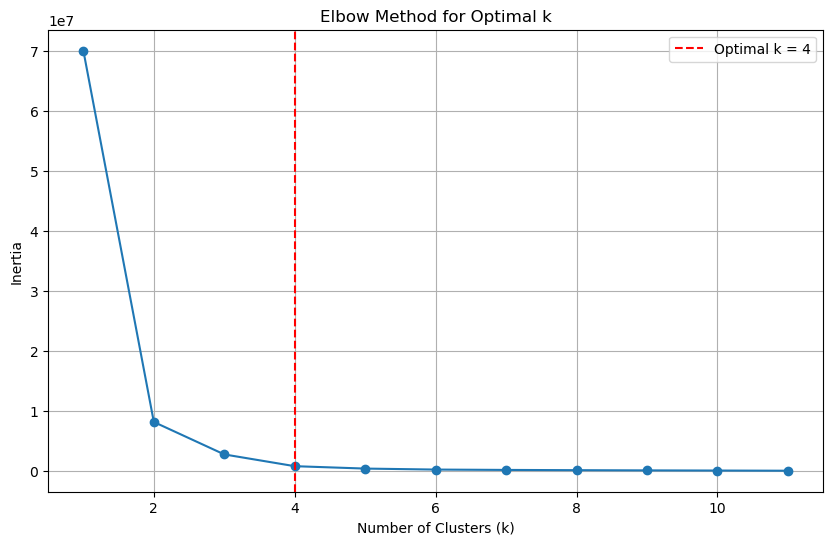

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_data['k'], elbow_data['Inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.axvline(x=4, color='r', linestyle='--', label='Optimal k = 4')  # Adjust t
plt.legend()
plt.grid()
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**
4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
best_k = 4
scaled = KMeans(n_clusters=best_k, random_state=42)


In [9]:
# Fit the K-Means model using the scaled data
scaled.fit(scaled_df)

c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [10]:
# Ensure the 'cluster' column does not exist in scaled_df
if 'cluster' in scaled_df.columns:
	scaled_df.drop(columns=['cluster'], inplace=True)

# Predict the clusters to group the cryptocurrencies using the scaled data
cluster = scaled.predict(scaled_df)

# Add the predicted clusters to the scaled_df DataFrame
scaled_df['cluster'] = cluster

# View the resulting array of cluster values.
print("Predicted cluster values:")
cluster

Predicted cluster values:


array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 3, 0, 0, 0, 2])

In [13]:
# Create a copy of the DataFrame
df_copy = scaled_df.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
scaled_df['cluster'] = cluster

# Display sample data
print("Sample data with predicted clusters:")
print(scaled_df.sample(5)) 


Sample data with predicted clusters:
             price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                
omisego                          4.84033                     6.82985   
ftx-token                        0.83416                     7.10438   
theta-token                     -4.56089                    -6.09456   
binancecoin                      2.10423                    12.85511   
neo                              0.49302                     2.44243   

             price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                 
omisego                        -13.21636                     -9.11552   
ftx-token                       -0.20629                    -10.56394   
theta-token                     -6.57354                     31.43355   
binancecoin                      6.80688                      0.05865   
neo                 

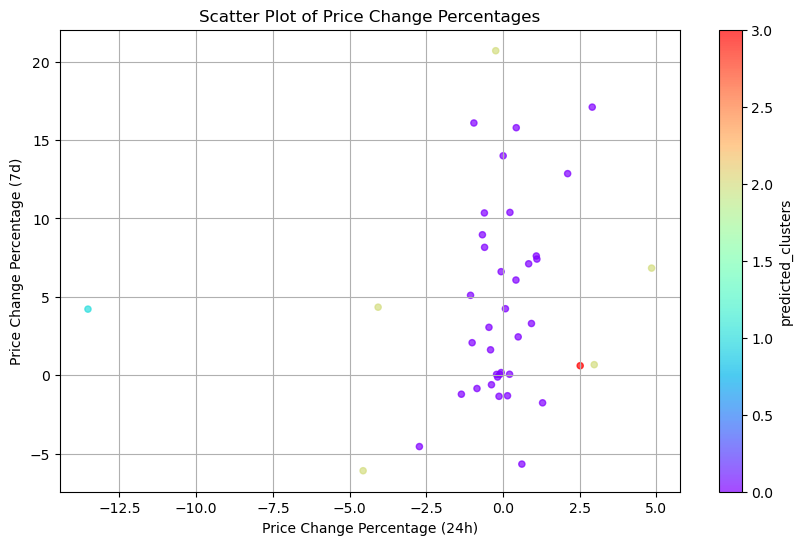

In [16]:
# Add the predicted clusters to the scaled_df DataFrame
scaled_df['predicted_clusters'] = cluster

# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scatter = scaled_df.plot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c='predicted_clusters',
    colormap='rainbow',
    alpha=0.7,
    figsize=(10, 6)
)

# Add titles and labels
plt.title("Scatter Plot of Price Change Percentages")
plt.xlabel("Price Change Percentage (24h)")
plt.ylabel("Price Change Percentage (7d)")
plt.grid(True)

# Show the plot
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)


In [18]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_array = pca_model.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pca_array, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame. 
(pca_df.head(5))


,PC1,PC2,PC3
0,-341.801104,-51.367937,12.526036
1,-249.420609,24.115483,-14.228047
2,-402.614861,-118.711115,24.836658
3,-406.752576,-79.488045,1.566162
4,-382.430089,-103.432520,16.751992


In [19]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

explained_variance_df = pd.DataFrame({
    'Principal Component': ['PC1', 'PC2', 'PC3'],
    'Explained Variance Ratio': explained_variance
})

(explained_variance_df)


,Principal Component,Explained Variance Ratio
0,PC1,0.976037
1,PC2,0.023029
2,PC3,0.000748


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [20]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pca_model = PCA(n_components=3)
pca_array = pca_model.fit_transform(scaled_df)

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(data=pca_array, columns=['PC1', 'PC2', 'PC3'])


# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_df.index


# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)


# Display sample data
(pca_df.head())


,PC1,PC2,PC3
coin_id,,,
bitcoin,-341.801104,-51.367937,12.526036
ethereum,-249.420609,24.115483,-14.228047
tether,-402.614861,-118.711115,24.836658
ripple,-406.752576,-79.488045,1.566162
bitcoin-cash,-382.430089,-103.432520,16.751992


### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(pca_df[['PC1', 'PC2', 'PC3']])  # Use only the PCA columns
    inertia_values.append(kmeans_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
(elbow_df)


c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

,k,inertia
0,1,6.997056e+07
1,2,8.180234e+06
2,3,2.779917e+06
3,4,8.237413e+05
4,5,4.264236e+05
5,6,2.615052e+05
6,7,2.027031e+05
7,8,1.602019e+05
8,9,1.253981e+05
9,10,1.022754e+05


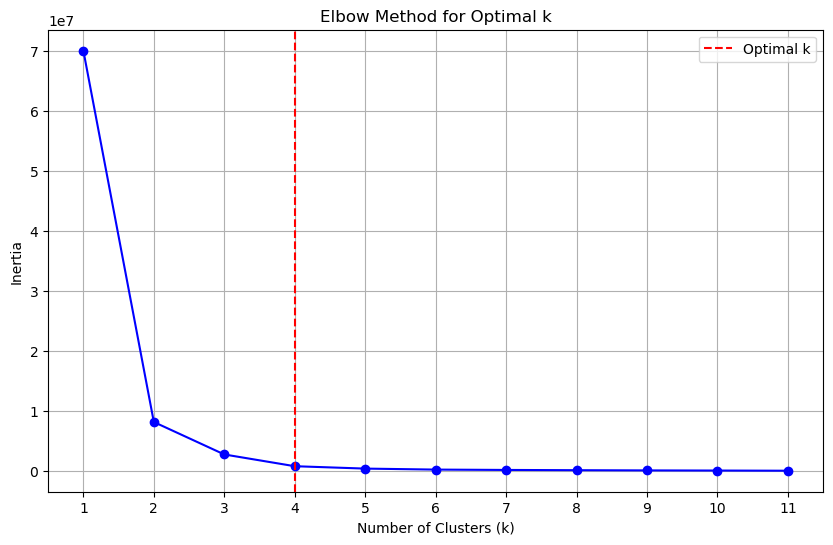

In [22]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
optimal_k = 4

plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid()
plt.axvline(x=optimal_k, color='r', linestyle='--', label='Optimal k')
plt.legend()
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [23]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)


In [24]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_df[['PC1', 'PC2', 'PC3']])

(pca_df.head())


c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,PC1,PC2,PC3
coin_id,,,
bitcoin,-341.801104,-51.367937,12.526036
ethereum,-249.420609,24.115483,-14.228047
tether,-402.614861,-118.711115,24.836658
ripple,-406.752576,-79.488045,1.566162
bitcoin-cash,-382.430089,-103.432520,16.751992


In [25]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = kmeans_model.predict(pca_df[['PC1', 'PC2', 'PC3']])  # Use the PCA columns


# Print the resulting array of cluster values.
(predicted_clusters)


array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 3, 0, 0, 0, 2])

In [26]:
# Create a copy of the DataFrame with the PCA data
pca_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_copy['Predicted_Cluster'] = predicted_clusters


# Display sample data
(pca_copy.sample(5))

,PC1,PC2,PC3,Predicted_Cluster
coin_id,,,,
binancecoin,-289.125161,12.285244,34.165903,0
litecoin,-406.613481,-91.783663,5.015554,0
okb,-255.261409,-124.798464,17.120303,0
tron,-306.197103,-11.954560,4.575143,0
ethereum,-249.420609,24.115483,-14.228047,0


In [27]:
# Create a scatter plot using hvPlot by setting `x="PC1"` and `y="PC2"`. 
scatter_plot = pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Predicted_Cluster',
    cmap='viridis',
    title='PCA Scatter Plot of Cryptocurrencies',
    xlabel='PC1',
    ylabel='PC2',
    size=100, 
    alpha=0.7
)
scatter_plot


:Scatter   [PC1]   (PC2,Predicted_Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [29]:
# Use the columns from the original scaled DataFrame as the index.
import pandas as pd

# Creating the DataFrame from the provided data
data = {
    'coin_id': ['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash', 'binancecoin', 
                'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv', 'crypto-com-chain', 
                'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb', 'stellar', 
                'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token', 'huobi-token', 
                'nem', 'binance-usd', 'iota', 'vechain', 'zcash', 'theta-token', 
                'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven', 'omisego', 
                'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd', 'digibyte', 'price_change_percentage_24h', 'price_change_percentage_7d']                                
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Set 'coin_id' as the index
df.set_index('coin_id', inplace=True)

# Display only the index
print("Index of the DataFrame:")
print(df.index)

Index of the DataFrame:
Index(['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash',
       'binancecoin', 'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv',
       'crypto-com-chain', 'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb',
       'stellar', 'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token',
       'huobi-token', 'nem', 'binance-usd', 'iota', 'vechain', 'zcash',
       'theta-token', 'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven',
       'omisego', 'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd',
       'digibyte', 'price_change_percentage_24h',
       'price_change_percentage_7d'],
      dtype='object', name='coin_id')


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** PC1 is heavily influenced by long-term price changes, particularly negatively by the 1-year change. PC2 also shows a strong negative influence from the 1-year change, while PC3 is positively influenced by the 14-day change but negatively influenced by the 200-day change.
    

In [32]:
import numpy as np

# Step 2: Fit PCA
pca = PCA()
pca.fit(scaled_df)

# Step 3: Get the loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Step 4: Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings, index=scaled_df.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# Display the loadings
(loadings_df)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
price_change_percentage_24h,-1.988080,0.789379,0.504314,0.206571,0.292153,-0.673903,1.359911,-0.021708,0.000000e+00
price_change_percentage_7d,-0.256918,-0.258661,-0.595664,2.503239,5.578585,-1.644372,-0.254701,0.005940,-3.905165e-35
price_change_percentage_14d,-0.921552,1.320064,4.589620,5.128989,3.982129,2.074635,0.220499,-0.008343,5.184076e-35
price_change_percentage_30d,1.248080,17.655755,13.665108,13.733170,-2.266668,-0.506730,-0.068902,0.003977,-1.133634e-35
price_change_percentage_60d,11.492949,31.787875,32.535465,-6.491448,0.508145,-0.089993,-0.026782,0.002335,3.240663e-36
price_change_percentage_200d,392.381089,188.198345,-6.283471,-0.190231,0.096249,0.044599,0.003474,-0.002502,-5.643766e-36
price_change_percentage_1y,1246.419781,-59.554987,1.668543,0.110634,-0.028167,-0.012595,0.001475,0.000577,1.400203e-36
cluster,0.300661,0.648493,-0.156439,-0.012600,0.024093,0.024559,0.055152,0.301148,-1.029204e-17
predicted_clusters,0.300661,0.648493,-0.156439,-0.012600,0.024093,0.024559,0.055152,0.301148,1.029204e-17
